# Introduction

In This project i wrangled and analyzed data collected from my IMDb web scraper ( [Link to the IMDb Web Scraper](https://github.com/Moohmad/IMDb-Scraper) ) to get various information about feature movies such as **Name**, **IMDb Rating**, **Runtime** and more, the data is collected for movies from **1968-01-01** to **2018-12-31**

# Data Wrangling

### Importing required libraries

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

% matplotlib inline

### Loading the data and summary

In [223]:
# Reading the data
imdb_df = pd.read_csv('data/imdb_data.csv')

### Discovering the data

In [224]:
# Checking first 3 rows
imdb_df.head(3)

,Unnamed: 0,rank,name,year,rating,metascore,votes,revenue,genre,runtime,directors,actors,description
0,0,1,2001: A Space Odyssey,1968.0,8.3,82.0,533017,56954992.0,"Adventure, Sci-Fi",149.0,Stanley Kubrick,"Keir Dullea, Gary Lockwood, William Sylvester,...",After discovering a mysterious artifact buried...
1,1,2,Once Upon a Time in the West,1968.0,8.5,80.0,266884,5321508.0,Western,165.0,Sergio Leone,"Henry Fonda, Charles Bronson, Claudia Cardinal...",A mysterious stranger with a harmonica joins f...
2,2,3,Rosemary's Baby,1968.0,8.0,96.0,167435,NaN,"Drama, Horror",137.0,Roman Polanski,"Mia Farrow, John Cassavetes, Ruth Gordon, Sidn...",A young couple moves in to an apartment only t...


In [225]:
# Checking last 3 rows
imdb_df.tail(3)

,Unnamed: 0,rank,name,year,rating,metascore,votes,revenue,genre,runtime,directors,actors,description
10197,10197,198,Teen Titans Go! To the Movies,2018.0,6.8,69.0,11164,29562341.0,"Animation, Action, Comedy",84.0,"Aaron Horvath, Peter Rida Michail","Greg Cipes, Scott Menville, Khary Payton, Tara...",A villain's maniacal plan for world domination...
10198,10198,199,Raid,2018.0,7.4,NaN,11082,1010385.0,"Action, Crime, Drama",122.0,Raj Kumar Gupta,"Ajay Devgn, Saurabh Shukla, Ileana D'Cruz, Ami...",A fearless income tax officer raids the mansio...
10199,10199,200,Mulk,2018.0,6.3,NaN,11073,NaN,Drama,140.0,Anubhav Sinha,"Tapsee Pannu, Rishi Kapoor, Prateik, Ashutosh ...",One family member tries to help her own family...


In [226]:
imdb_df.shape

(10200, 13)

In [227]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 13 columns):
Unnamed: 0     10200 non-null int64
rank           10200 non-null int64
name           10200 non-null object
year           10199 non-null float64
rating         10200 non-null float64
metascore      5647 non-null float64
votes          10200 non-null int64
revenue        6839 non-null float64
genre          10200 non-null object
runtime        10198 non-null float64
directors      10200 non-null object
actors         10200 non-null object
description    10200 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 1.0+ MB


In [228]:
imdb_df.describe()

,Unnamed: 0,rank,year,rating,metascore,votes,revenue,runtime
count,10200.000000,10200.000000,10199.000000,10200.000000,5647.000000,1.020000e+04,6.839000e+03,10198.000000
mean,5099.500000,100.500000,1992.997941,6.563804,56.587923,6.086748e+04,3.939572e+07,107.475093
std,2944.630707,57.737136,14.719429,1.040472,17.927759,1.277322e+05,6.282130e+07,21.144425
min,0.000000,1.000000,1968.000000,1.300000,1.000000,5.950000e+02,2.100000e+01,45.000000
25%,2549.750000,50.750000,1980.000000,6.000000,44.000000,3.898500e+03,4.273629e+06,94.000000
50%,5099.500000,100.500000,1993.000000,6.700000,57.000000,1.832750e+04,1.776890e+07,103.000000
75%,7649.250000,150.250000,2006.000000,7.300000,70.000000,5.906625e+04,4.699132e+07,116.000000
max,10199.000000,200.000000,2018.000000,9.400000,100.000000,2.062617e+06,9.366622e+08,450.000000


In [229]:
imdb_df.columns

Index(['Unnamed: 0', 'rank', 'name', 'year', 'rating', 'metascore', 'votes',
       'revenue', 'genre', 'runtime', 'directors', 'actors', 'description'],
      dtype='object')

In [230]:
imdb_df.duplicated().sum()

0

In [231]:
imdb_df.isnull().sum()

Unnamed: 0        0
rank              0
name              0
year              1
rating            0
metascore      4553
votes             0
revenue        3361
genre             0
runtime           2
directors         0
actors            0
description       0
dtype: int64

In [232]:
imdb_df[imdb_df["year"].isnull()]

,Unnamed: 0,rank,name,year,rating,metascore,votes,revenue,genre,runtime,directors,actors,description
9424,9424,25,Maze Runner: The Scorch Trials,NaN,6.3,43.0,197578,81697192.0,"Action, Sci-Fi, Thriller",131.0,Wes Ball,"Dylan O'Brien, Kaya Scodelario, Thomas Brodie-...","After having escaped the Maze, the Gladers now..."


In [233]:
imdb_df[imdb_df["runtime"].isnull()]

,Unnamed: 0,rank,name,year,rating,metascore,votes,revenue,genre,runtime,directors,actors,description
2170,2170,171,Petrol krallari,1978.0,6.8,NaN,949,NaN,Comedy,NaN,Zeki Alasya,"Zeki Alasya, Metin Akpinar, Suna Yildizoglu, M...",Two inseparable friends find a gasoline source...
3174,3174,175,Khamsa Bab,1983.0,6.2,NaN,1449,NaN,"Comedy, Drama",NaN,Nader Galal,"Adel Emam, Nadia El Gendy, Fouad El-Mohandes, ...",A policeman gets fired and starts to drink at ...


**Observations:**
- There's 10200 rows and 13 columns
- Wrong datatype for some of the columns
- There's 3361 null values in revenue and 4553 null values in metascore
- 1 Null value in year which can be filled with the right year
- 2 Null values in runtime which can be filled or dropped

# Data Cleaning

**Data Cleaning Steps:**
- Drop 'Unnamed: 0' column from the dataset
- Dropping every row with no 'revenue'
- Filling the 'year' null value with the right year (2015)
- Converting data to the right datatype

### Dropping 'Unnamed: 0'

In [234]:
del_cols = ['Unnamed: 0']

imdb_df = imdb_df.drop(del_cols, axis=1)

In [235]:
print(imdb_df.shape)

(10200, 12)


There's 12 columns now

### Dropping rows with no 'revenue'

In [236]:
# replacing all the zeros from revenue and budget cols.

cols = ['revenue']

# dropping all the rows with na in the columns mentioned above in the list.
imdb_df.dropna(subset=cols, inplace=True)
imdb_df.shape

(6839, 12)

There's 6839 rows now

In [237]:
imdb_df.isnull().sum()

rank              0
name              0
year              1
rating            0
metascore      1561
votes             0
revenue           0
genre             0
runtime           0
directors         0
actors            0
description       0
dtype: int64

### Filling the movie with the right year

In [238]:
imdb_df["year"].fillna(2015, inplace=True)

In [239]:
imdb_df[imdb_df["year"].isnull()]

,rank,name,year,rating,metascore,votes,revenue,genre,runtime,directors,actors,description


### Converting to the right datatype

In [240]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6839 entries, 0 to 10198
Data columns (total 12 columns):
rank           6839 non-null int64
name           6839 non-null object
year           6839 non-null float64
rating         6839 non-null float64
metascore      5278 non-null float64
votes          6839 non-null int64
revenue        6839 non-null float64
genre          6839 non-null object
runtime        6839 non-null float64
directors      6839 non-null object
actors         6839 non-null object
description    6839 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 694.6+ KB


In [241]:
imdb_df["year"] = imdb_df["year"].astype(int)
imdb_df["revenue"] = imdb_df["revenue"].astype(int)

In [242]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6839 entries, 0 to 10198
Data columns (total 12 columns):
rank           6839 non-null int64
name           6839 non-null object
year           6839 non-null int32
rating         6839 non-null float64
metascore      5278 non-null float64
votes          6839 non-null int64
revenue        6839 non-null int32
genre          6839 non-null object
runtime        6839 non-null float64
directors      6839 non-null object
actors         6839 non-null object
description    6839 non-null object
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 641.2+ KB


'year' and 'revenue' has been converted

In [243]:
imdb_df.head()

,rank,name,year,rating,metascore,votes,revenue,genre,runtime,directors,actors,description
0,1,2001: A Space Odyssey,1968,8.3,82.0,533017,56954992,"Adventure, Sci-Fi",149.0,Stanley Kubrick,"Keir Dullea, Gary Lockwood, William Sylvester,...",After discovering a mysterious artifact buried...
1,2,Once Upon a Time in the West,1968,8.5,80.0,266884,5321508,Western,165.0,Sergio Leone,"Henry Fonda, Charles Bronson, Claudia Cardinal...",A mysterious stranger with a harmonica joins f...
3,4,Planet of the Apes,1968,8.0,79.0,154752,33395426,"Adventure, Sci-Fi",112.0,Franklin J. Schaffner,"Charlton Heston, Roddy McDowall, Kim Hunter, M...",An astronaut crew crash-lands on a planet in t...
4,5,Night of the Living Dead,1968,7.9,89.0,103830,89029,Horror,96.0,George A. Romero,"Duane Jones, Judith O'Dea, Karl Hardman, Maril...",There is panic throughout the nation as the de...
5,6,Bullitt,1968,7.5,83.0,54658,42300873,"Action, Crime, Mystery",114.0,Peter Yates,"Steve McQueen, Jacqueline Bisset, Robert Vaugh...","An all guts, no glory San Francisco cop become..."


# Data Exploring & Analysis

### Correlation table

In [244]:
imdb_df.corr()

,rank,year,rating,metascore,votes,revenue,runtime
rank,1.000000,0.146957,-0.344116,-0.227354,-0.525278,-0.473276,-0.215217
year,0.146957,1.000000,0.032386,-0.046370,0.230580,0.204086,0.063692
rating,-0.344116,0.032386,1.000000,0.741985,0.381307,0.136187,0.385224
metascore,-0.227354,-0.046370,0.741985,1.000000,0.266679,0.092804,0.275161
votes,-0.525278,0.230580,0.381307,0.266679,1.000000,0.625052,0.278616
revenue,-0.473276,0.204086,0.136187,0.092804,0.625052,1.000000,0.186777
runtime,-0.215217,0.063692,0.385224,0.275161,0.278616,0.186777,1.000000


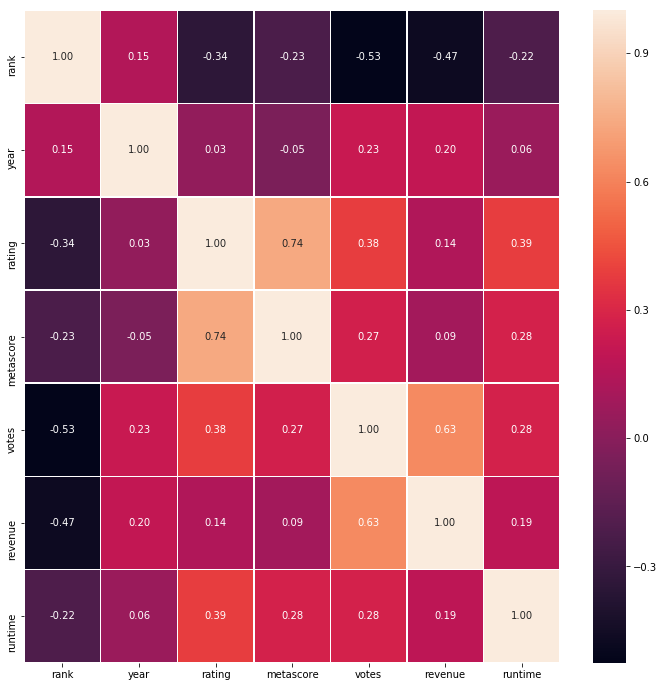

In [245]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(imdb_df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

One of the strongest correlations are:
1. Revenue vs Votes (0.63)
2. Votes vs rank (-0.53)
3. Revenue vs Rank(-0.47)


## 'Description' Most common words WorldCloud

There are 1056326 words.


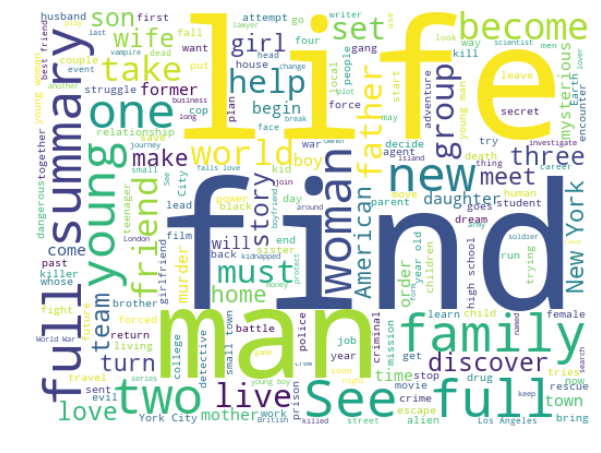

In [246]:
text = " ".join(review for review in imdb_df.description)
print ("There are {} words.".format(len(text)))

stopwords = set(STOPWORDS)

plt.subplots(figsize = (10,10))

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width = 512,
    height = 384).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**The most used words are:**
- Find
- Life
- Man
- Full
- See
- Family
- Help
- Father
- Summary
- World

## Revenue Vs Year Range (5 year)

In [247]:
bins = [1968, 1973, 1978, 1983, 1988, 1993, 1998, 2003, 2008, 2013, 2018]
cut1 = pd.cut(imdb_df.year, bins=bins)
imdb_df['year_range'] = cut1

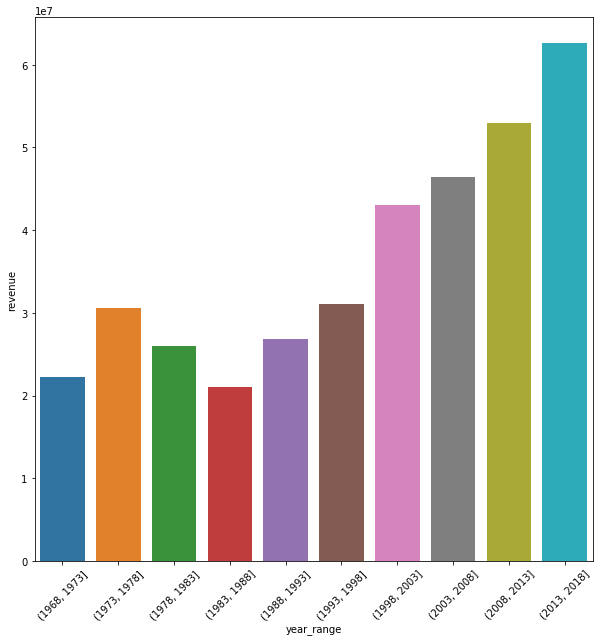

In [248]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(imdb_df['year_range'],imdb_df['revenue'],ci=None);

As shown in the plot "revenue" is in continuous rise as the time goes by.

In [249]:
cut2 = pd.cut(imdb_df.rating, bins=list(np.arange(1,11)))
imdb_df['imdb_score_bin'] = cut2

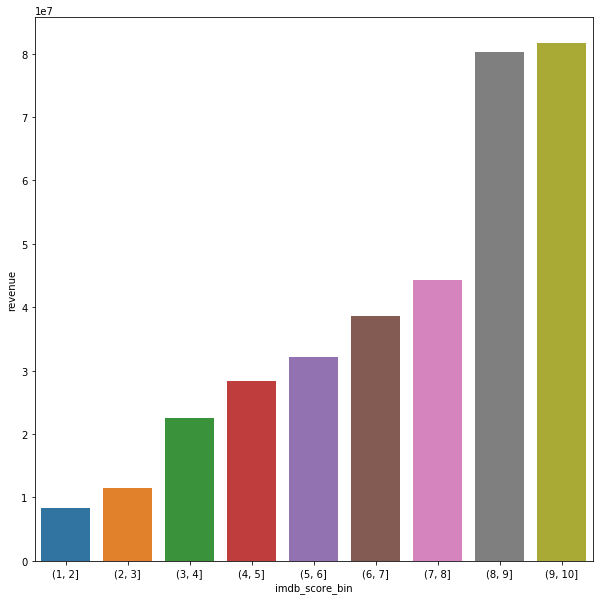

In [250]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(imdb_df['imdb_score_bin'],imdb_df['revenue'],ci=None);

The plot shows as the imdb rating is higher the revenue goes higher, but starting from [8, 9] and [9, 10] rating we can see that the revenue is really close and there's a big jump in revenue from movies that have [7, 8] and [8, 9] rating.

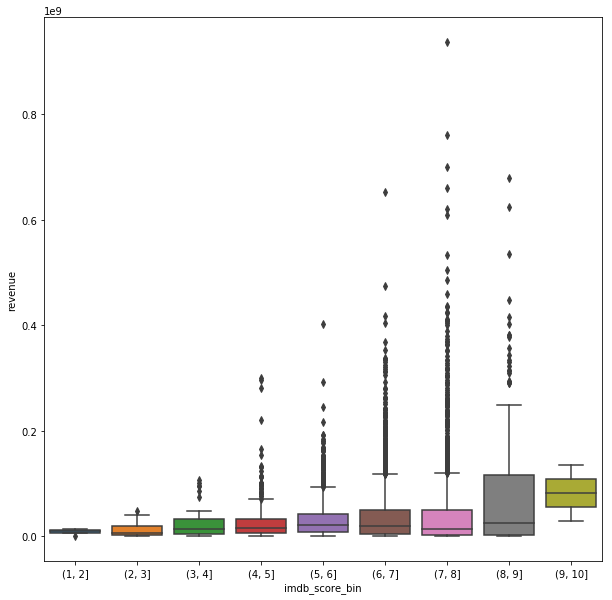

In [251]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=imdb_df,x='imdb_score_bin',y='revenue');

**Observations:**
- [8, 9] Rating has the biggest range
- [7, 8] Rating seems have the most outliers
- [1, 2] Rating has the smalles range
- There doesn't seem to be outliers in Rating [9, 10]

## Genres Distribution and Top 20 Most Common Genres

In [252]:
imdb_df['genre']=imdb_df['genre'].str.split(',')
list_genre=[]

# extending the list to 
for i in imdb_df['genre']:
    list_genre.extend(i)

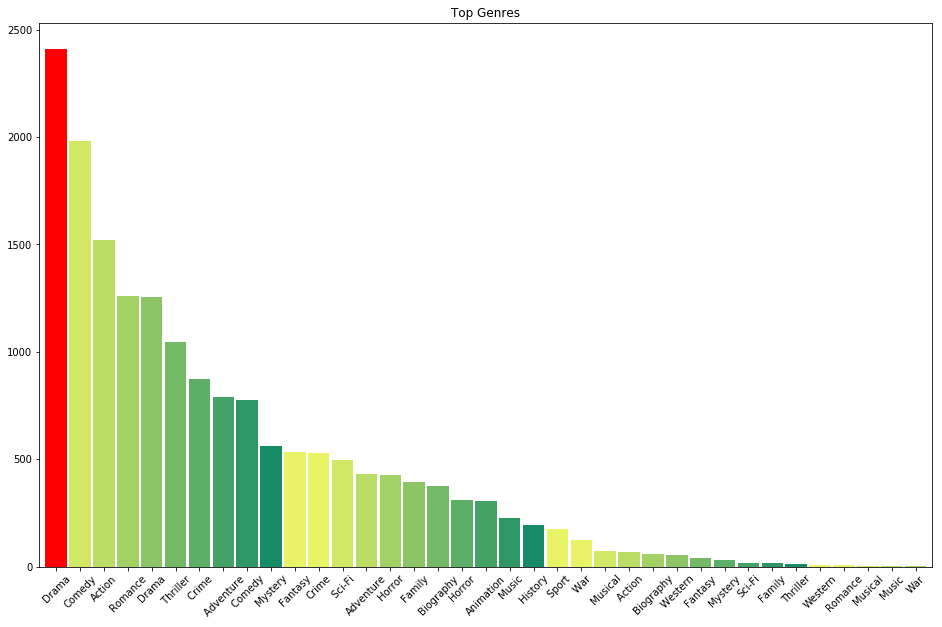

In [253]:
plt.subplots(figsize=(16,10))
ax = pd.Series(list_genre).value_counts().sort_values(ascending=False).plot.bar(
    width=0.9,
    color=sns.color_palette('summer_r',10))

ax.patches[0].set_facecolor('r')
plt.xticks(rotation=45)
plt.title('Top Genres')
plt.show()

Drama, Comedy and Action Seems to be the most common and War, Music, Romance and western seems not too common

### Top 20 Genre Count

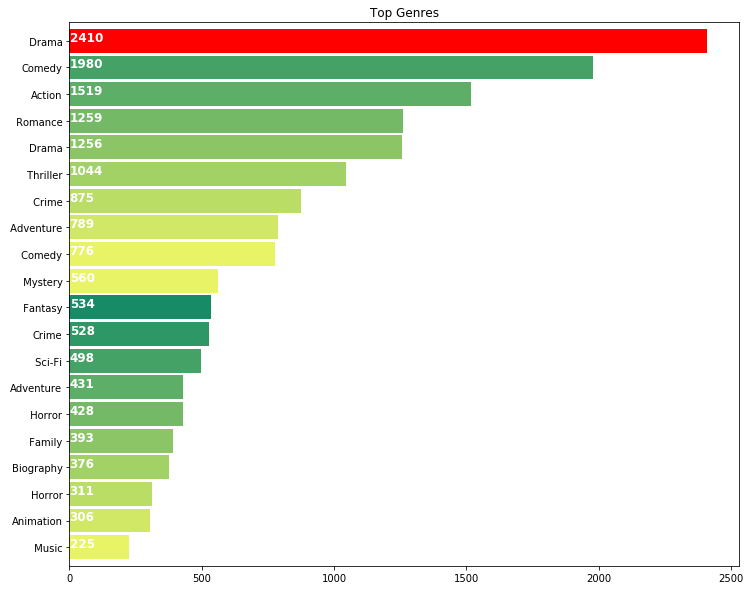

In [254]:
plt.subplots(figsize=(12,10))
ax = pd.Series(list_genre).value_counts()[:20].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list_genre).value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[19].set_facecolor('r')
plt.title('Top Genres')
plt.show()

## Top 20 Most Common Actors

In [255]:
imdb_df['actors']=imdb_df['actors'].str.split(',')

list_actor=[]
for i in imdb_df['actors']:
    list_actor.extend(i)

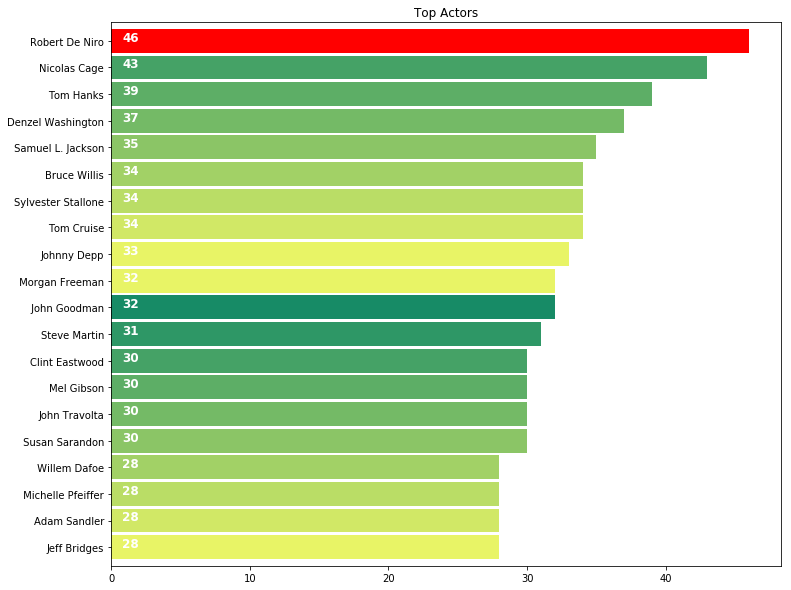

In [256]:
plt.subplots(figsize=(12,10))

ax = pd.Series(list_actor).value_counts()[:20].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list_actor).value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[19].set_facecolor('r')
plt.title('Top Actors')
plt.show()

Robert De Niro seems to be most common actor with 46 Movies followed up by Nicolas Cage with 43 Movies.

## Runtime of all movies

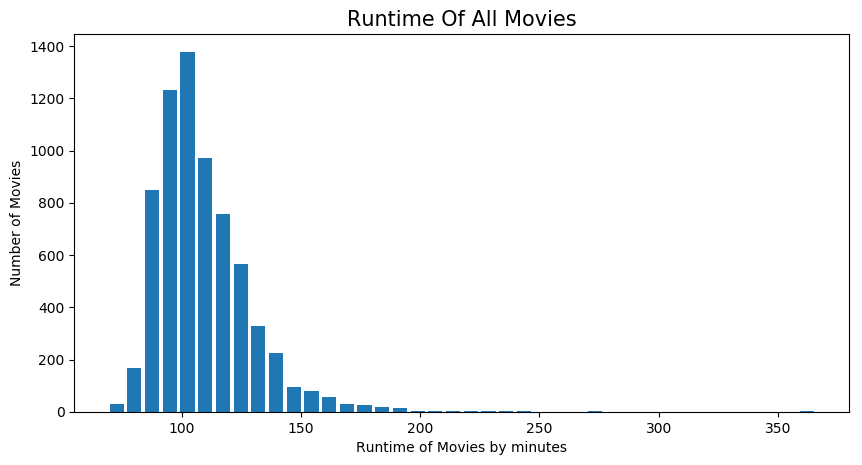

In [257]:
# Giving a figure size
plt.figure(figsize=(10,5), dpi=100)
# Giving a label name to x,y axis
plt.xlabel('Runtime of Movies by minutes', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)
# Name of the graph.
plt.title('Runtime Of All Movies', fontsize=15)
# Giving a histogram plot
plt.hist(imdb_df['runtime'], rwidth=0.8, bins=40)
# Display the plot
plt.show()

The above graph show us that most movies are timed between 80 and 120 minutes, And the distribution is right skewed.